In [176]:
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

S(t) - Geometric Brownian Motion <br>
r > 0, $\sigma$ > 0, S(0) = 1

---
# Task1

Смоделировать процесс S(t). Проверить экспериментально формулу для математического ожидания MS(T). Увидеть зависимость скорости сходимости к математическому ожиданию от $\sigma$ (т.е. зафиксировать число случайных траекторий N, увеличивать $\sigma$ и следить за отклонением среднего от MS(T)).

$dS(t) = S(t)rdt+S(t)\sigma dW(t)$ <br>
$S(t)=S(0)e^{(r-\frac{\sigma^2}{2})t+\sigma W(t)}$
$r,\sigma\in R$, $\sigma > 0$ - волатильность, $r>0$ - безрисковая процентная ставка.

In [37]:
R = 0.1
Sigma = 0.01

In [231]:
def modulate_asset_price(S0=1, r=0.0, sigma = 0, steps=100, trajectory_num=100,
                         start=0, end=1) -> np.ndarray:
    """
    Моделирование цены актива по формуле: 

    math: `$S(t) = S(0)e^{(r-\frac{\sigma^2}{2})t+\sigmaW(t)}$`
    
    Arguments:
        S0, float - начальная стоиомсть актива, по умолчанию 1
        r, float - безрисковая процентная ставка, по умолчанию 0.0
        sigma, float - волатильность, по умолчанию 0.0
        steps, int - количество шагов процесса, по умолчанию 100
        trajectory_num, int - количество случайных траеторий процесса, которые необходимо смоделировать
        start, float - начальное значение времени
        end, float - конечное значение времени
    
    Returns:
        S_t, np.ndarray - матрица траекторий цен актива
    """
    wiener_process_matrix = wiener_process(steps=steps, trajectory_num=trajectory_num)
    _time = np.linspace(start, end, num=steps+1)
    degree = np.expand_dims((r - sigma ** 2 / 2)*_time, axis=0) + sigma * wiener_process_matrix
    S_t = np.exp(degree)
    return S_t


def wiener_process(initial_value=0, steps=100, trajectory_num=100):
    """
    Генерация последовательности значений, соответствующих винеровскому процессу.
    
    Arguments:
        initial_value, float - начальное значение процесса, по умолчанию 0
        steps, int - количество шагов процесса, по умолчанию 100
        trajectory_num, int - количество случайных траеторий процесса, которые необходимо смоделировать
    
    Returns:
        trajectories, np.ndarray - матрица траеторий
    """
    # создаем
    values = np.zeros((trajectory_num, steps+1))
    values[:, 0] = initial_value
    for i in range(steps):
        previous_value = values[:, i]
        noise = np.random.normal(0, 1, size=(previous_value.shape))
        new_value = previous_value + noise
        values[:,i+1] += new_value
    return values

<Axes: >

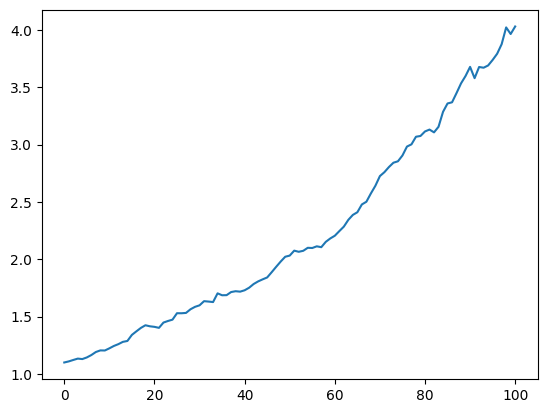

In [233]:
# sns.lineplot(modulate_asset_price(r=0.1, sigma=0.1)[0,:], legend=False)
sns.lineplot(modulate_asset_price(r=0.1, sigma=0.1, start=1, end=10).mean(axis=0), legend=False)

$MS(T) = S(0)e^{rT}$

In [234]:
def expectationS(S0=1., r=0.0, steps=100, start=0, end=1) -> np.ndarray:
    """
    Computes theoretical expectation of S(t) in time
    math: `MS(T)=S(0)e^{rT}`

    Arguments:
        S0, float - начальная цена актива
        r, float - безрисковая процентная ставка
        steps, int - количество шагов по времени
        start, float - начальное значение времени
        end, float - конечное значение времени
        
    
    Returns:
        expectation, np.ndarray - вектор математических ожиданий
                                  цен актива по времени
    """
    _time = np.linspace(start, end, num=steps+1)
    expectationS = S0 * np.exp(r*_time)
    return expectationS

In [235]:
def calculate_empirical_expectation(S0=1, r=0.0, sigma = 0, steps=100, trajectory_num=100):
    S_values = modulate_asset_price(S0=S0, r=r, sigma=sigma, steps=steps, trajectory_num=trajectory_num)
    return S_values.mean(axis=0)

In [236]:
calculate_empirical_expectation(r=R, sigma=Sigma).shape

(101,)

In [237]:
STEPS = 100
N = 10**6

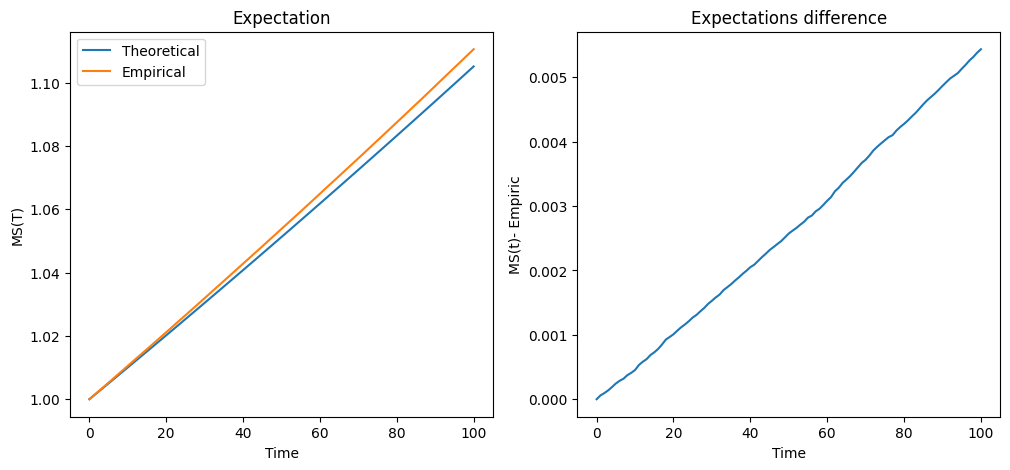

In [238]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

axs[0].plot(expectationS(r=R, steps=STEPS), label='Theoretical')
axs[0].plot(calculate_empirical_expectation(r=R, sigma=Sigma, steps=STEPS, trajectory_num=N), label='Empirical')
axs[0].set_title('Expectation')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('MS(T)')

axs[1].plot(np.abs(expectationS(r=R, steps=STEPS) - calculate_empirical_expectation(r=R, sigma=Sigma, steps=STEPS, trajectory_num=N)))
axs[1].set_title('Expectations difference')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('MS(t)- Empiric')

axs[0].legend()
plt.show()

In [173]:
sigmas = np.linspace(0, 0.1, num=100)

In [174]:
def calc_empirical_expectetions_varying_sigma(sigmas: np.ndarray, S0=1, r=0.0, steps=100, trajectory_num=100) -> np.ndarray:
    """
        Calculates an empirical expectations for different sigmas

        Arguments:
            sigmas, np.ndarray - an array of sigmas to calculate expectations
            S0, float - an asset start price
            r, float - a riskless rate value
            steps, int - a number of timesteps
            trajectory_num, int - a number of trajectories to modulate

        Returns: 
            expectations, np.ndarray - an array of expectations for a corresponding sigmas
    """

    expectations = np.zeros_like(sigmas)
    for idx, sigma in enumerate(sigmas):
        expectations[idx] += modulate_asset_price(S0=S0, r=r, sigma=sigma, steps=steps, 
                                                  trajectory_num=trajectory_num).mean(axis=0)[-1]
    return expectations

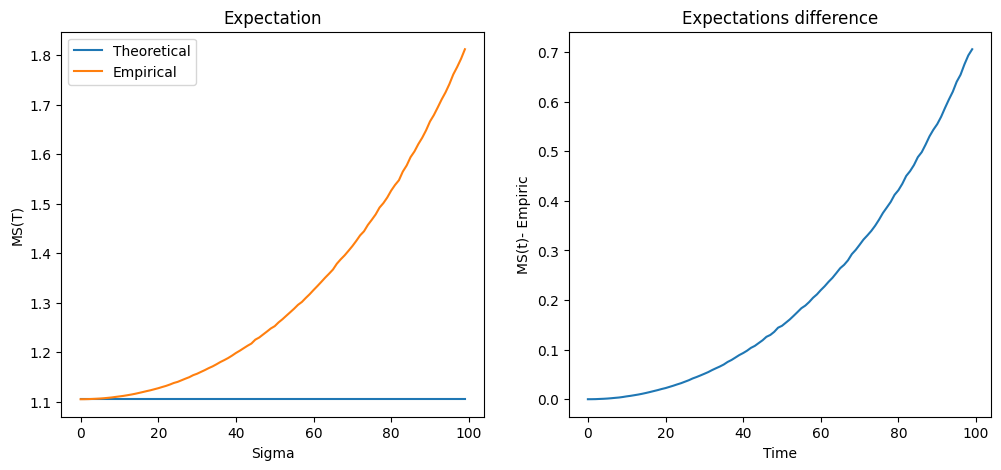

In [175]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

axs[0].plot(np.ones_like(sigmas)*np.exp(R*1), label='Theoretical')
axs[0].plot(calc_empirical_expectetions_varying_sigma(sigmas=sigmas, r=R, steps=STEPS, 
                                                      trajectory_num=N), label='Empirical')
axs[0].set_title('Expectation')
axs[0].set_xlabel('Sigma')
axs[0].set_ylabel('MS(T)')
axs[0].legend()

axs[1].plot(np.abs(np.ones_like(sigmas)*np.exp(R*1) - \
                   calc_empirical_expectetions_varying_sigma(sigmas=sigmas, r=R, steps=STEPS, 
                                                      trajectory_num=N)))
axs[1].set_title('Expectations difference')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('MS(t)- Empiric')

plt.show()

---
# Task 2

Нарисовать графики c(t,x) как функции от x при t = 0.05T, 0.8T, 0.99T.

$c(t,S(t)) = S(0)\Phi(\alpha_{+})-Ke^{-rt}\Phi(\alpha_{-})$

$\alpha_{\pm}=\frac{1}{\sigma\sqrt{T}}[\ln{\frac{S(t)}{K}} + (r\pm\frac{\sigma^2}{2})T]$

In [239]:
def calculate_option_price(S0=1, K=1.3, r=0.0, sigma=0.0, steps=100, trajectory_num=100,
                           start=0, end=1):
    """
        Calculates an option price respect to the price change of an underlying

        Arguments:
            S0, float - a start price of the underlying
            K, float - a strike
            r, float - a riskless rate
            sigma, float - volatility
            steps, float - a number if time steps
            trajectory_num - a number of trajectories to consider while modulating
            start, float - start time
            end, float - 
    
    """
    S = modulate_asset_price(S0=S0, r=r, sigma=sigma, steps=steps, start=start, end=end,
                             trajectory_num=trajectory_num).mean(axis=0)
    alpha_pl = (np.log(S / K) + (r + sigma**2 / 2) * np.linspace(0, 1, steps+1)) / sigma / 1
    alpha_ms = (np.log(S / K) + (r - sigma**2 / 2) * np.linspace(0, 1, steps+1)) / sigma / 1
    return S0 * norm.cdf(alpha_pl, loc=0, scale=1) + \
        K * np.exp(-r*np.linspace(start, end, steps+1)) * norm.cdf(alpha_ms, loc=0, scale=1), S

[5, 80, 99]


[]

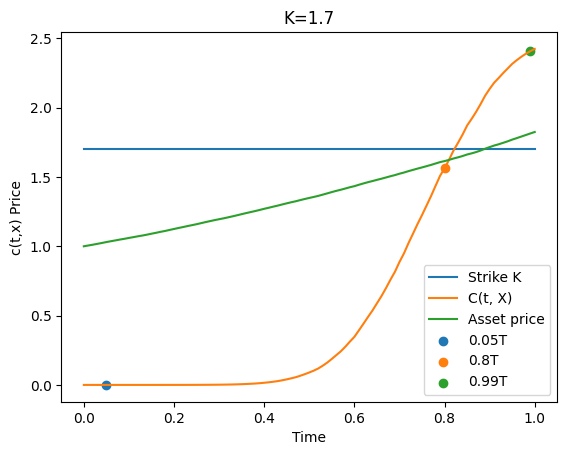

In [240]:
K = 1.7
START = 0
END=1

times = [0.05, 0.8, 0.99]
indexes = [int(i*100) for i in times]
print(indexes)

option_prices, ss = calculate_option_price(K=K, r=R, sigma=0.1, trajectory_num=100000, 
                                           start=START, end=END)
plt.plot( np.linspace(START, END, STEPS+1), np.ones_like(ss)*K, label='Strike K')
plt.plot( np.linspace(START, END, STEPS+1), option_prices, label='C(t, X)')
plt.plot( np.linspace(START, END, STEPS+1), ss, label='Asset price')

plt.scatter( np.linspace(START, END, STEPS+1)[indexes[0]], option_prices[indexes[0]], label='0.05T')
plt.scatter( np.linspace(START, END, STEPS+1)[indexes[1]], option_prices[indexes[1]], label='0.8T')
plt.scatter( np.linspace(START, END, STEPS+1)[indexes[2]], option_prices[indexes[2]], label='0.99T')

plt.title(f"K={K}")
plt.xlabel('Time')
plt.ylabel('c(t,x) Price')
plt.legend()
plt.plot()

---
# Task 3

Нарисовать графики греческих параметров $\delta,\  \gamma,\ \theta,\ k,\ vega,\ \rho $как фукнции от х

$\delta = c'_x(t,x) = \Phi(\alpha_{+}(\tau, x))$ <br>

$\gamma = c''_{xx}(t,x) = \Phi'(\alpha_{+})\frac{1}{x\sigma\sqrt{\tau}} = \frac{1}{\sqrt{2\pi}}e^{-\frac{\alpha_{+}^2}{2}}\frac{1}{x\sigma\sqrt{\tau}}$ <br>

$\theta = c'_t(t,x) = -Kre^{-r\tau}\Phi(\alpha_{-}) - \frac{\sigma x}{2\sqrt{\tau}}\frac{1}{\sqrt{2\pi}}e^{-\frac{\alpha_{+}^2}{2}}$ <br>

$vega=c'_{\sigma}(t,x)=\frac{x\sqrt{\tau}}{\sqrt{2\pi}}e^{-\frac{\alpha_{+}^2}{2}}$ <br>

$k = c'_K(t,x) = -e^{-r\tau}\Phi(\alpha_{-})$ <br>

$rho = c'_r(t,x) = K\tau e^{-r\tau}\phi(\alpha_{-})$

In [ ]:
def delta():
    """
        math: 
    """
    pass

def gamma():
    pass

def theta():
    pass

def k_derivative():
    pass

def vega():
    pass

def rho():
    pass

---
# Task 4

Рассмотрите портфель $X(t) = c(t, S(t)) - c_x(t, S(t))S(t)$, <br>
где $c_x(t,S(t))$ - частная производная по х. Разделить отрезок [0, T] точками $t_i = \frac{iT}{n}$, смоделируйте процесс S(t) и постройте график портфеля X(t) как функции от t в точках t_i. Постройте в том же окне график $e^{rt} X(0)$ как функции от t